In [1]:
import pandas as pd
import numpy as np

## Reasoning

**Split-Apply-Combine technique** - Series, Data‐
Frame, or otherwise, is split into groups based on one or more keys that you provide. A function is applied to each group, producing a new value. Finally,
the results of all those function applications are combined into a result object
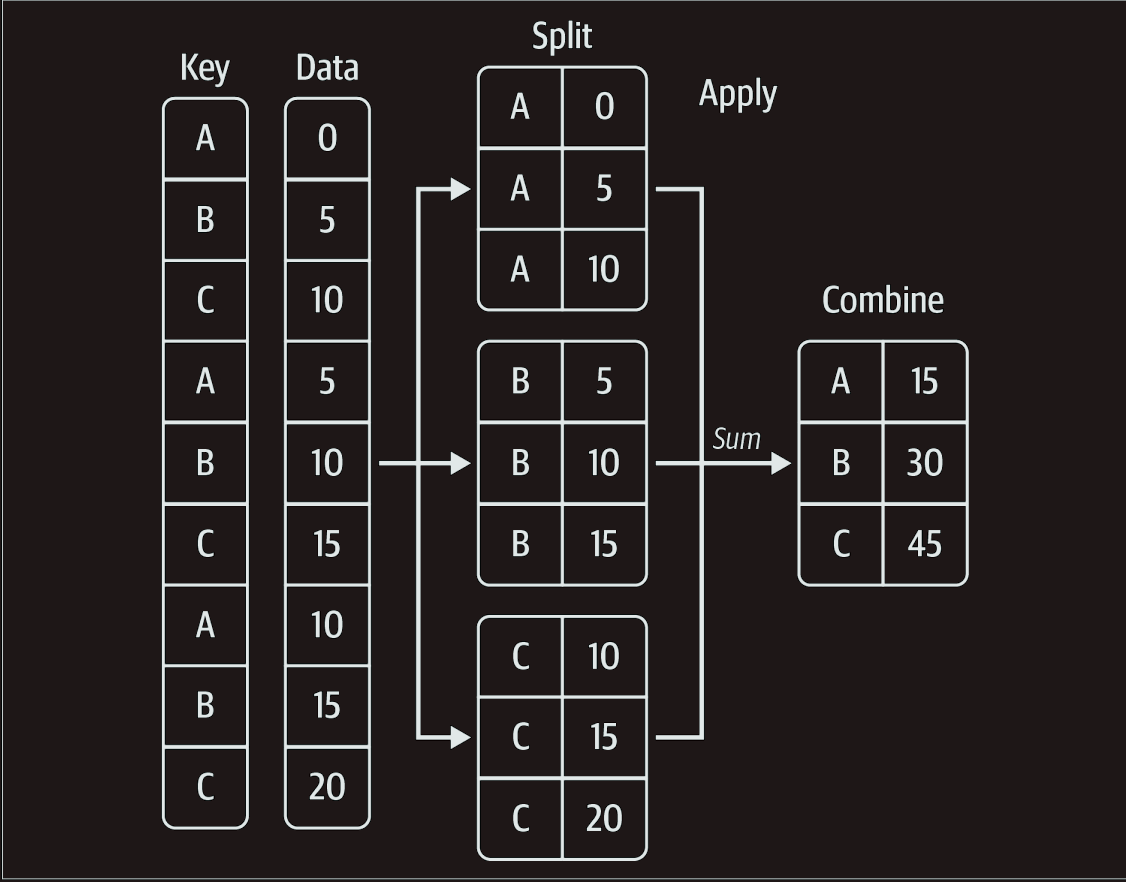

In [2]:
# groupby
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
 "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
 "data1" : np.random.standard_normal(7),
 "data2" : np.random.standard_normal(7)})
df

key1  key2     data1     data2
0     a     1  1.529671  0.326448
1     a     2  0.437312 -0.878486
2  None     1 -0.309222  1.621311
3     b     2 -2.862312  2.433588
4     b     1  0.142232  0.711516
5     a  <NA> -0.346112 -0.794206
6  None     1 -1.208693  0.263011

In [3]:
groups = df["data1"].groupby(df["key1"])
groups

In [4]:
groups.mean()

key1
a    0.54029
b   -1.36004
Name: data1, dtype: float64

In [5]:
mul_g = df["data1"].groupby([df["key1"], df["key2"]]) # Hierarchical index
mul_g

In [6]:
df.groupby("key1").mean()

key2    data1     data2
key1                         
a      1.5  0.54029 -0.448748
b      1.5 -1.36004  1.572552

In [7]:
groups.size() # Size of each group
# .count() - non null value count

key1
a    3
b    2
Name: data1, dtype: int64

In [8]:
# Iteration
for name, group in groups: # name can be a tuple for hierarchical index
    print(name)
    print(group)

a
0    1.529671
1    0.437312
5   -0.346112
Name: data1, dtype: float64
b
3   -2.862312
4    0.142232
Name: data1, dtype: float64


In [9]:
# Column/Subset selection
df.groupby("key1")["data1"] 
# == df["data1"].groupby(df["key1"])

In [10]:
# Grouping with dict, series
people = pd.DataFrame(np.random.standard_normal((5, 5)),
 columns=["a", "b", "c", "d", "e"],
 index=["Joe", "Steve", "Wanda", "Jill", "Trey"])
people.iloc[2:3, [1, 2]] = np.nan
people

a         b         c         d         e
Joe    0.747409 -1.118716  0.579150 -2.050604 -0.527528
Steve  0.412071 -0.586621 -1.166568  0.165345 -0.223352
Wanda  0.090457       NaN       NaN -1.018287  0.578744
Jill   0.259464  1.516561  2.773055  0.903562  0.052037
Trey  -0.461141  0.031278 -0.332131 -1.308637  0.317308

In [11]:
mapping = {"a": "red", "b": "red", "c": "blue",
 "d": "blue", "e": "red", "f" : "orange"}
by_column = people.groupby(mapping, axis="columns")
by_column.sum()

blue       red
Joe   -1.471453 -0.898835
Steve -1.001223 -0.397903
Wanda -1.018287  0.669201
Jill   3.676617  1.828062
Trey  -1.640767 -0.112555

In [12]:
# Grouping with functions
people.groupby(len).sum()

a         b         c         d         e
3  0.747409 -1.118716  0.579150 -2.050604 -0.527528
4 -0.201677  1.547839  2.440924 -0.405075  0.369345
5  0.502528 -0.586621 -1.166568 -0.852941  0.355392

In [13]:
# Grouping with hierarchical indexing
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
  [1, 3, 5, 1, 3]],
  names=["cty", "tenor"])
hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.401363  1.453832 -0.551764 -0.482875  2.077453
1      1.848742 -1.441008  0.561404 -1.366225 -0.620055
2      1.530030 -0.515848  1.229863  0.708651  0.231785
3      2.406790  1.847096 -2.537487 -0.866398  1.918889

In [14]:
hier_df.groupby(level="cty", axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation
Aggregations refer to any data transformation that produces scalar values from arrays.


In [16]:
groups.nsmallest(2) # Selects the smallest requested number of values from the data.

key1   
a     5   -0.346112
      1    0.437312
b     3   -2.862312
      4    0.142232
Name: data1, dtype: float64

In [22]:
groups.agg([np.mean, np.std])

mean       std
key1                   
a     0.54029  0.942122
b    -1.36004  2.124533

In [23]:
groups.agg([("Mean", np.mean), ("Std dev", np.std)])

Mean   Std dev
key1                   
a     0.54029  0.942122
b    -1.36004  2.124533

In [24]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
  "data2": np.random.standard_normal(1000)})
frame

data1     data2
0   -1.523380  0.802496
1    1.208822  0.691830
2    0.507436 -0.079888
3   -0.063884  0.828866
4    1.021999  1.676678
..        ...       ...
995  1.245627 -1.805310
996 -0.235226  0.350881
997  0.151276  0.277568
998 -0.099677 -0.140335
999 -0.078848  0.728055

[1000 rows x 2 columns]

In [26]:
quartiles = pd.cut(frame["data1"], 4)
quartiles

0      (-1.905, -0.134]
1       (-0.134, 1.637]
2       (-0.134, 1.637]
3       (-0.134, 1.637]
4       (-0.134, 1.637]
             ...       
995     (-0.134, 1.637]
996    (-1.905, -0.134]
997     (-0.134, 1.637]
998     (-0.134, 1.637]
999     (-0.134, 1.637]
Name: data1, Length: 1000, dtype: category
Categories (4, interval[float64, right]): [(-3.684, -1.905] < (-1.905, -0.134] < (-0.134, 1.637] < (1.637, 3.408]]

In [27]:
def get_stats(group):
 return pd.DataFrame(
 {"min": group.min(), "max": group.max(),
 "count": group.count(), "mean": group.mean()}
 )
grouped = frame.groupby(quartiles)
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.684, -1.905] data1 -3.676550 -1.919908     28 -2.312473
                 data2 -2.897516  1.881310     28 -0.019461
(-1.905, -0.134] data1 -1.900818 -0.135554    437 -0.830784
                 data2 -3.692694  2.571545    437 -0.040545
(-0.134, 1.637]  data1 -0.132850  1.636341    491  0.589033
                 data2 -3.309888  2.697511    491 -0.067647
(1.637, 3.408]   data1  1.651166  3.407930     44  2.097656
                 data2 -1.541498  2.759701     44 -0.039630